In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical


In [ ]:
#Loading Data
import pandas as pd
data = pd.read_csv("diabetes.csv")
data.head()
#data.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Predictors --- Label
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[feature_cols]
Y = data['Outcome']

In [ ]:
#normalization
X_norm = X.apply(lambda x:(x-x.min())/(x.max()-x.min()))    #normalization
X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.25, random_state=42)

In [ ]:
#one hot encoding
onehot = pd.get_dummies(Y_train)
target_labels = onehot.columns
Y_train = np.array(onehot)

onehot = pd.get_dummies(Y_test)
target_labels = onehot.columns
Y_test = np.array(onehot)
Y_test
X_train.shape[1]

8

In [ ]:
#Create model
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 10)
n_cols = X_train.shape[1]
model = Sequential()    # two ways to build your model, here we use the sequential model
model.add(Dense(100,activation = 'relu',input_shape = (n_cols,)))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(200,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(40,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train,Y_train,validation_split = 0.3,epochs = 100,callbacks = [early_stopping_monitor])

Epoch 1/100
13/13 [==============================] - 1s 39ms/step - loss: 0.6753 - accuracy: 0.6352 - val_loss: 0.6497 - val_accuracy: 0.6532
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6375 - accuracy: 0.6551 - val_loss: 0.6127 - val_accuracy: 0.6532
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5877 - accuracy: 0.6948 - val_loss: 0.5509 - val_accuracy: 0.7110
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5418 - accuracy: 0.7221 - val_loss: 0.5645 - val_accuracy: 0.7052
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4964 - accuracy: 0.7419 - val_loss: 0.5264 - val_accuracy: 0.7225
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4915 - accuracy: 0.7667 - val_loss: 0.5206 - val_accuracy: 0.7514
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4863 - accuracy: 0.7643 - val_loss: 0.5460 - val_accuracy: 0.7514
Epoch 8/100


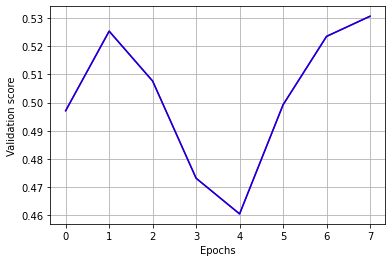

In [ ]:
#to Plot

# Fit model
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 3)
import matplotlib.pyplot as plt
model_training = model.fit(X_train,Y_train,validation_split = 0.3,epochs = 100,callbacks = [early_stopping_monitor],verbose = False)

# Create the plot
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [ ]:
#to save your model: save in file format HDF5 --> h5 format

model.save('Diabetes_model.h5')

In [ ]:
#Reload your model

from keras.models import load_model
model = load_model('Diabetes_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               900       
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 200)               20200     
                                                                 
 dense_11 (Dense)            (None, 50)                10050     
                                                                 
 dense_12 (Dense)            (None, 40)                2040      
                                                                 
 dense_13 (Dense)            (None, 2)                

In [ ]:
#make prediction

prediction = model.predict(X_test)   # you should here replace predictors with test data prediction
prediction[:,1]   # probability true -- the probability that the shot is made

array([1.82775989e-01, 8.77360441e-03, 6.57729758e-03, 3.63738425e-02,
       1.15156889e-01, 3.02267194e-01, 7.39179435e-04, 3.18508387e-01,
       8.19262803e-01, 5.66768825e-01, 2.98146103e-02, 7.43890703e-01,
       1.05868690e-01, 3.38070035e-01, 2.45895758e-02, 6.39175057e-01,
       1.61679965e-02, 7.77242705e-03, 7.12177932e-01, 8.14745188e-01,
       6.73967078e-02, 1.26778046e-02, 3.98345701e-02, 2.41921353e-03,
       6.45175517e-01, 8.78198266e-01, 3.84340882e-02, 2.17979401e-03,
       3.58523079e-03, 8.95881057e-02, 9.10976410e-01, 8.31295788e-01,
       8.96362841e-01, 9.45766568e-01, 6.91439390e-01, 7.35661268e-01,
       3.64729196e-01, 8.94012526e-02, 1.39152892e-02, 8.99292231e-01,
       1.79540832e-02, 6.02906823e-01, 3.32584739e-01, 6.78579882e-02,
       3.42913601e-03, 6.66461706e-01, 5.42465210e-01, 7.16861486e-02,
       3.47932428e-02, 9.55953002e-01, 2.23989389e-03, 7.25357652e-01,
       8.29718530e-01, 3.76082398e-02, 4.46852017e-03, 2.17288593e-03,
      